# Option Pricing via Numerical Integration of (payoff) * (price PDF given spot)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Fixed Parameters
S0 = 100
K = 140
r = 0.05
q = 0.01
sig = 0.3
T = 1.0

In [ ]:
# model under consideration
model = 'LogNormal'

In [ ]:
def logNormal(S, r, q, sig, S0, T):
    
    f = np.exp(-0.5*((np.log(S/S0)-(r-q-sig**2/2)*T)/(sig*np.sqrt(T)))**2)/(sig*S*np.sqrt(2*np.pi*T))
    return f

In [ ]:
def evaluateIntegral(*args):
    
    r   = args[0]
    q   = args[1]
    S0  = args[2]
    K   = args[3]
    sig = args[4]
    T   = args[5]
    N   = args[6]
    dS  = args[7]
    
    #discount factor
    df = np.exp(-r*T)
    
    # evaluation of the integral using Trapezoidal method
    
    # Calls and Puts are evaluated differently
    #--------------------------------------------------------------
    
    # Calls - Integrate from K to B
    
    S = np.zeros((N,1))
    for j in range(N):
        S[j] = K+j*dS
    
    tmp = logNormal(S, r, q, sig, S0, T)
    sumC = 0
    for j in range(N):
        if j==0:
            wj = dS/2
        else:
            wj = dS
        sumC += (S[j]-K)*tmp[j]*wj
        
    c0_KT = df * sumC
    
    
    # Puts - Integrate from 0 to K
    
    S = np.zeros((N,1))
    eta = K/N
    print(eta)
    for j in range(N):
        S[j] = 0.1+j*eta 
        
    tmp = logNormal(S, r, q, sig, S0, T)
    sumP = 0
    for j in range(N):
        if j == 0:
            wj = eta/2
        else:
            wj = eta
        sumP += (K-S[j])*tmp[j]*wj

    p0_KT = df * sumP
    
    return c0_KT, p0_KT 

In [ ]:
# plotting lognormal density f(S|S0)
   
S = np.zeros((N,1))
for i in range(N):
    S[i] = dS+i*dS

f = logNormal(S, r, q, sig, S0, T)

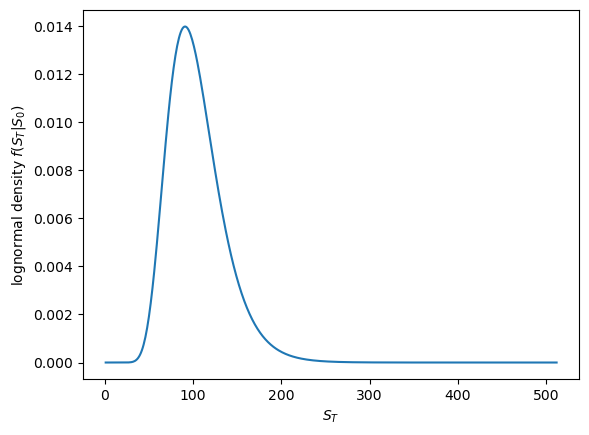

In [ ]:
plt.plot(S, f)
plt.xlabel('$S_T$')
plt.ylabel('lognormal density $f(S_T|S_0)$')
plt.show()


In [ ]:
#step-size
dS = 1.0 # same as eta in notes

# number of grid points
n = 9
N = 2**n
B = K + N*dS

start_time = time.time()
print(' ')
print('===================')
print('Model is %s' % model)
print('-------------------')
arg = (r, q, S0, K, sig, T, N, dS)
c0_KT, p0_KT = evaluateIntegral(*arg)
print(c0_KT, p0_KT)
elapsed_time = time.time() - start_time
print(elapsed_time)

 
Model is LogNormal
-------------------
0.2734375
[2.91366011] [37.08120176]
0.007981061935424805
